In [7]:
import sys
sys.path.append('../src')
import read_lif
import matplotlib.pyplot as plt

# Use the lif reader

Suppose I have a lif file that looks like this in ImageJ

<img src='files.png' alt="Drawing" style="width: 400px;"/>

To load the data as `numpy.ndarray` into python, we need to do following things.

## Specifying the Filename

The first step in the is to construct a `Reader` instance, tell the reader the name of the lif file

In [8]:
lif_file_name = '../test/sample.lif'
reader = read_lif.Reader(lif_file_name)

## Getting the Serires list

Then we need to get the series list by `getSeries()`. The result is a `list`. Its elements contains the entry to the content of different images. We can use `getName()` to see the name of these images.

Notice: the list only contains the handler of images. The real data won't be loaded into the memory in this step.

In [9]:
series = reader.getSeries()
for image_handler in series:
    print(image_handler.getName())

fish 2
fish 3
fish11
fish 10


## Getting the Content

Let's say I need the data of the first channel in the 2nd image. I will use `getFrame()` to extract the data from lif file as `numpy.ndarray` in python.

There are three parameters for `getFrame()`

1. channel: the default channel is 0
2. T: the frame number, the default value is 0
3. dtype: the datatype of the image, the default value is `np.uint8`. Some deconvolution software may generate images with `np.uint16` as datatype

The result image has the shape of `(x, y, z)`

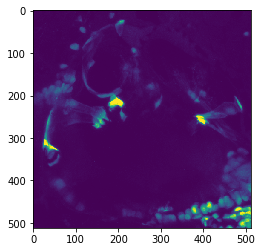

The shape is (512, 512, 223)


In [30]:
chosen_handler = series[1]
image = chosen_handler.getFrame(channel=0)
plt.imshow(image.max(-1))
plt.show()
print('The shape is {}'.format(image.shape))

## Getting the metadata

The following metadata can be retrieved by `getMetadata()` function

1. The voxel sizes of different dimension
2. The voxel numbers of different dimension
3. The unit of the voxel size
4. The channel numbers
5. The frame numbers

The result is given as a `dict`

In [31]:
metadata = chosen_handler.getMetadata()

for key in metadata:
    print('{:<16} {}'.format(key, metadata[key]))

voxel_size_y     0.525093405214
voxel_size_x     0.525093405214
voxel_size_unit  um
voxel_size_z     0.629425649095
voxel_number_z   223
voxel_number_y   512
voxel_number_x   512
channel_number   3
frame_number     1


## Getting the Header File

The header of a lif file contains the full description of everything related to the image. One can use the function `get_xml()` to get the information, as save it as an xml file

In [32]:
header = read_lif.get_xml(lif_file_name)

with open('metadata.xml', 'w') as f:
    f.write(header)

The xml file looks like this

<img src='xml.png' alt="Drawing" style="width: 800px;"/>